In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/garil_production/questions.zip" -d "/content/drive/My Drive/Colab Notebooks/garil_production/"

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/mongo/physics_quest/"

In [0]:
from PIL import Image
import os   
from statistics import mean 
from scipy.spatial import distance

In [0]:
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors
n_neigh = 7

In [0]:
def list_files(dir):
    list_of_images = []
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file == '.DS_Store':
                continue
            else:
                list_of_images.append(str(os.path.join(subdir, file)))
    return list_of_images

In [0]:
list_of_paths = list_files(path)

In [0]:
#list_of_paths

In [0]:
len(list_of_paths)

22757

In [0]:
unwanted_images = []

In [0]:
def resize_img_save_it(list_of_paths):
    for img in list_of_paths:
        try:
            im1 = Image.open(img)
            width = 228
            height = 228
            im5 = im1.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter
            im5.save(img)
        except:
            unwanted_images.append(img)
            print(img)
            continue
            

In [0]:
from multiprocessing import pool
 
from multiprocessing.dummy import Pool as ThreadPool
 

In [0]:
pool = ThreadPool(10)
 
pool.map( resize_img_save_it, list_of_paths )

In [0]:
#resize_img_save_it(list_of_paths)


In [0]:
def get_numpy_array():
    X_train = []
    #path = '/Users/nikeshmangwani/Desktop/LSH-study/LSH/examples/keyur/questions/physics/images'
    #list_of_paths = list_files(path)
    for img in list_of_paths:
        image = cv2.imread(img)
        X_train.append(image)
        
    return (np.array(X_train),list_of_paths)

In [0]:
X_train,list_of_paths = get_numpy_array()

In [0]:
X_train.shape

(402, 228, 228, 3)

In [0]:
X_train = X_train.astype('float32') / 255.

In [0]:
X_train.shape

(402, 228, 228, 3)

In [0]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
input_img = Input(shape=(228,228,3))
x = Conv2D(64,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(16,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=8, callbacks=None )


Epoch 1/20
402/402 [==============================] - 3s 6ms/step - loss: 0.0736
Epoch 2/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 3/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 4/20
402/402 [==============================] - 1s 3ms/step - loss: 0.0616
Epoch 5/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 6/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 7/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 8/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 9/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 10/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 11/20
402/402 [==============================] - 1s 3ms/step - loss: 0.0616
Epoch 12/20
402/402 [==============================] - 1s 4ms/step - loss: 0.0616
Epoch 13/20
402/402 [====

In [0]:
autoencoder.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 228, 228, 64)      1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 114, 114, 32)      18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 57, 57, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 57, 57, 16)        4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 29, 29, 16)        0   

In [0]:
autoencoder.save('biology_autoencoder_cg_8_8_8.h5')


In [0]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)


In [0]:
encoder.save("biology_encoder_cg_8_8_8.h5")

In [0]:
from google.colab import files
files.upload()
files.download("biology_encoder_cg_8_8_8.h5")

In [0]:
print(history.history.keys())

dict_keys(['loss'])


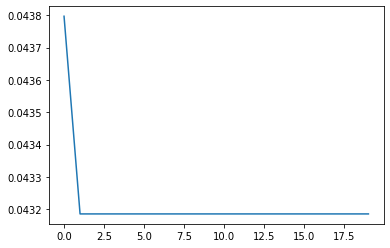

In [0]:
plt.plot(history.history['loss'])

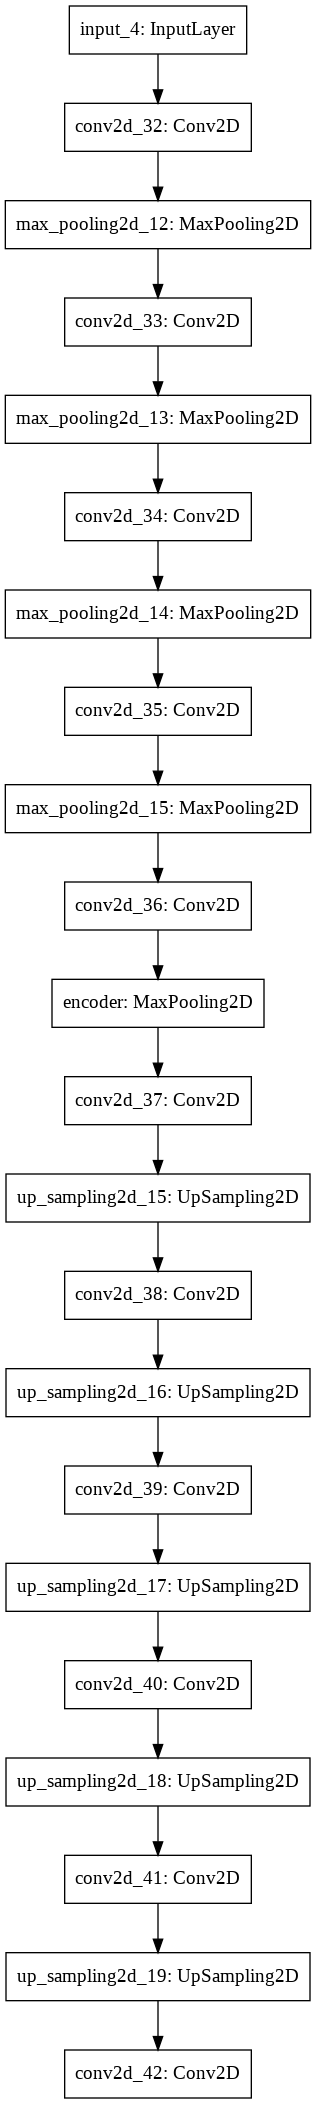

In [0]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png')

In [0]:
for layer in autoencoder.layers:
    print(layer)
    weights = layer.get_weights()
    print("printing weights")
    print(weights)



printing weights
[]
printing weights
[array([[[[-0.02968381,  0.03975815, -0.07233772, ...,  0.00218343,
           0.06265783,  0.09542034],
         [ 0.01301836,  0.03909853,  0.10747871, ..., -0.03521048,
          -0.07628463,  0.09359631],
         [ 0.02662234,  0.09404618,  0.0498597 , ...,  0.03558572,
          -0.00694891,  0.05067591]],

        [[-0.05658621, -0.04085767, -0.0264625 , ...,  0.01492525,
           0.09280936, -0.00360673],
         [-0.00974958, -0.00741366, -0.03303007, ...,  0.06055642,
           0.05390422, -0.01820646],
         [ 0.03030657, -0.0128911 , -0.04643556, ...,  0.07635675,
          -0.06202026,  0.007302  ]],

        [[-0.03843853,  0.09992588, -0.06084513, ..., -0.09585909,
           0.00258838, -0.01685242],
         [-0.06425463,  0.06717377,  0.03817521, ..., -0.05285915,
           0.01022615,  0.08258586],
         [-0.05918708,  0.02375307,  0.01410466, ..., -0.08880067,
          -0.06416058,  0.03478097]]],


       [[[ 0.01435

In [0]:
lower_dimension_codes = encoder.predict(X_train)

NameError: ignored